<a href="https://colab.research.google.com/github/tuteixeira/DC_course/blob/main/M5A21.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [4]:
#https://archive.ics.uci.edu/ml/machine-learning-databases/diabetes/
#source from df
arquivo = 'pima-data (1).csv'
columns = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
pima_df = pd.read_csv(arquivo, names = columns)
array = pima_df.values
pima_df.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
pima_df.isna().sum()

In [ ]:
pima_df.info()

In [12]:
pima_df.describe()

,preg,plas,pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


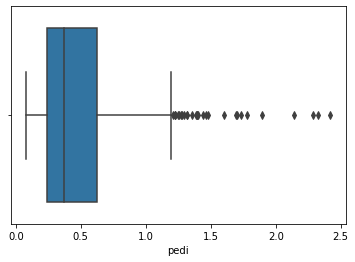

In [13]:
#pedi variable graph (checking outliers)
sns.boxplot(pima_df.pedi)

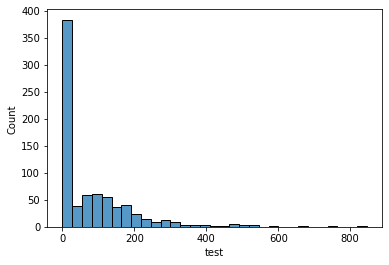

In [15]:
#test variable graph
sns.histplot(pima_df.test)

In [16]:
pima_df.corr()

,preg,plas,pres,skin,test,mass,pedi,age,class
preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
plas,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
pres,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
test,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
mass,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
pedi,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
class,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [5]:
#splitting the array in input and output values
x = array[:, 0:8]
y = array[:, 8]

In [6]:
#Setting fold values
num_folds = 10
seed = 7

In [7]:
#Splitting data into fold
kfold = KFold(num_folds, shuffle = True, random_state = seed)

In [12]:
#Model to ML
model = LogisticRegression()

#Cross validation
result = cross_val_score(model, x, y, cv = kfold)

In [ ]:
#Evaluating the machine without normalization or standardization (accuracy will be the mean to cross validation)
print(result.mean()*100)

#Accuracy is 77.60423786739577

In [20]:
#Data normalization or data standardization? In this project I ll do the both technical for checking the better technical

In [ ]:
#Data normalization with MinMxScaler
scaler = MinMaxScaler(feature_range = (0,1))
rescaled_x = scaler.fit_transform(x)

#Model to ML
model = LogisticRegression()

#Cross validation
result = cross_val_score(model, rescaled_x, y, cv = kfold)

#Evaluating the machine using normalization
print(result.mean()*100)

#Accuracy is 77.47949419002052

In [ ]:
#Data standardization with StanderScaler
scaler = StandardScaler().fit(x)
standard_x = scaler.transform(x)

#Model to ML
model = LogisticRegression()

#Cross Validation
result = cross_val_score(model, standard_x, y, cv = kfold)

#Evaluating the machine using standardization
print(result.mean()*100)

#Accuracy is 77.3462064251538

In [14]:
#Comparing the logistic regression results with XGBoost

In [18]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [20]:
#Train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 7)

In [26]:
#Building ML
model = XGBClassifier()

#Training the model
model.fit(x_train, y_train)

#Predicting using test data
y_pred = model.predict(x_test)
forecasts = [round(value) for value in y_pred]

In [28]:
#Evaluating the machine
accuracy = accuracy_score(y_test, forecasts)
print(accuracy*100)

#Accuracy is 77.95275590551181

77.95275590551181
